In [61]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [62]:
df = pd.read_csv('../SP500_data.csv')
df

,year,dividendYield,Peratio,ShillerPEratio,10yearTyield,SP500level,annual_return
0,1950,0.0744,7.47,11.90,0.0257,21.21,NaN
1,1951,0.0602,9.95,12.53,0.0268,24.19,0.140500
2,1952,0.0541,10.86,13.01,0.0283,26.18,0.082265
3,1953,0.0584,10.10,12.00,0.0248,25.46,-0.027502
4,1954,0.0440,12.58,15.99,0.0261,35.60,0.398272
...,...,...,...,...,...,...,...
65,2015,0.0211,22.18,24.21,0.0209,1918.60,-0.054029
66,2016,0.0203,23.59,28.06,0.0243,2275.12,0.185823
67,2017,0.0185,24.97,33.31,0.0258,2789.80,0.226221
68,2018,0.0209,19.60,28.38,0.0271,2607.39,-0.065385


In [63]:
#df = df[['year','annual_return','dividendYield']][df['year'] > 1990]
df = df[['year','annual_return','dividendYield']][df['year'] < 1990]
df

,year,annual_return,dividendYield
41,1991,0.278319,0.0314
42,1992,0.046025,0.0284
43,1993,0.086759,0.0270
44,1994,-0.016364,0.0289
45,1995,0.320623,0.0224
46,1996,0.247062,0.0200
47,1997,0.257289,0.0161
48,1998,0.296265,0.0136
49,1999,0.141595,0.0117
50,2000,-0.063104,0.0122


In [64]:
df.describe()

,year,annual_return,dividendYield
count,29.000000,29.000000,29.000000
mean,2005.000000,0.097035,0.020038
std,8.514693,0.169592,0.005265
min,1991.000000,-0.372204,0.011700
25%,1998.000000,-0.016364,0.017600
50%,2005.000000,0.113730,0.019200
75%,2012.000000,0.247062,0.021300
max,2019.000000,0.320623,0.032300


In [65]:
df.loc[df['annual_return'] > 0]['annual_return'].describe()

count    21.000000
mean      0.179887
std       0.095000
min       0.014003
25%       0.112941
50%       0.185823
75%       0.257289
max       0.320623
Name: annual_return, dtype: float64

In [66]:
df.loc[df['annual_return'] < 0]['annual_return'].describe()

count    8.000000
mean    -0.120450
std      0.120873
min     -0.372204
25%     -0.163315
50%     -0.064244
75%     -0.048491
max     -0.016364
Name: annual_return, dtype: float64

<Axes: title={'center': 'S&P500'}, ylabel='Frequency'>

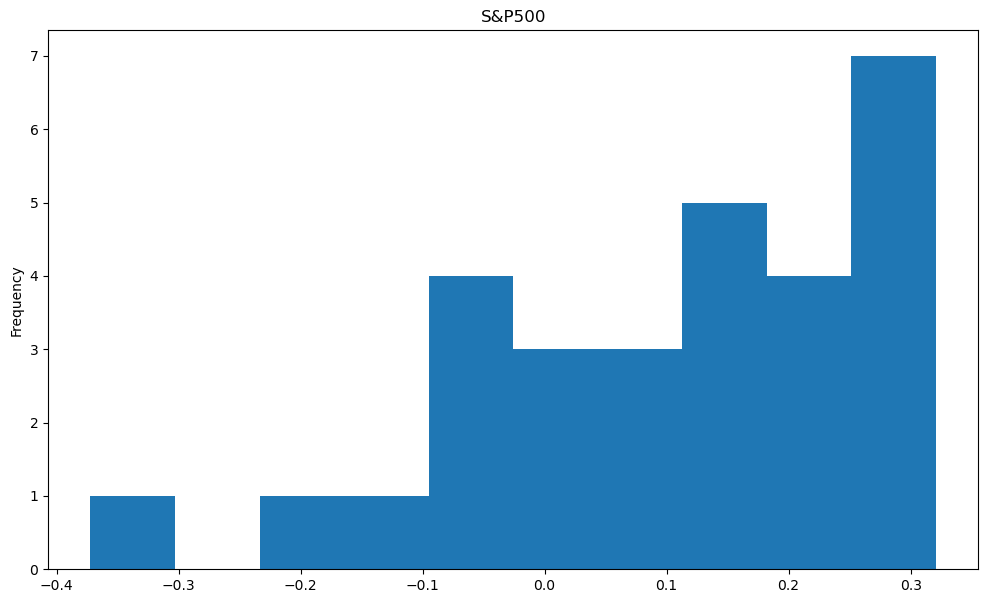

In [67]:
df['annual_return'].plot(kind = 'hist', figsize = (12, 7), title = 'S&P500')

[Text(0.5, 0, 'Normal Scores'), Text(0, 0.5, 'S&P500 Annual Return')]

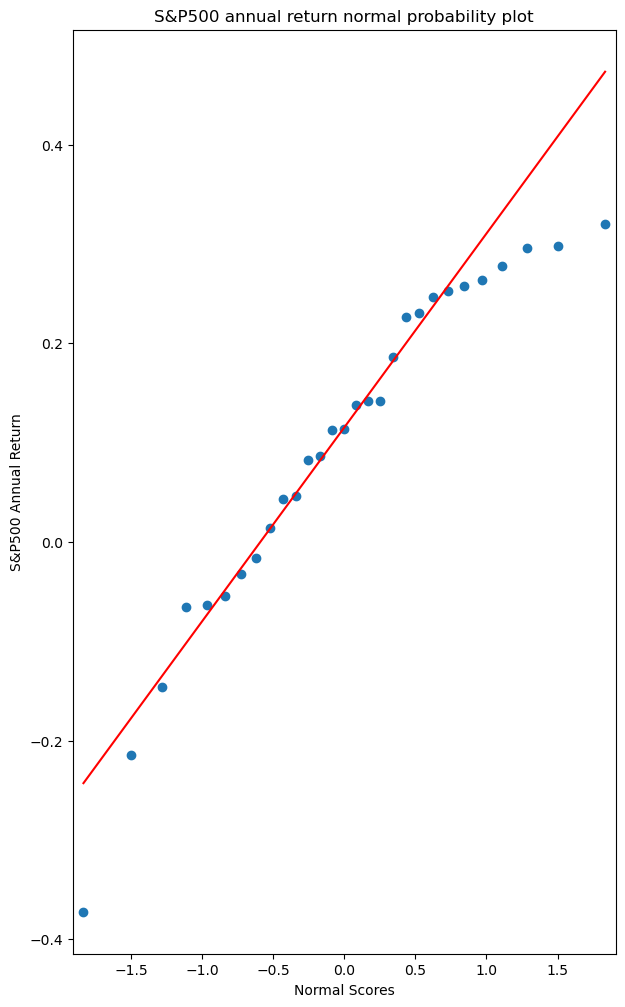

In [68]:
fig, ax = plt.subplots(figsize = (7, 12))
fig = sm.qqplot(df['annual_return'], line = 'q', ax = ax)
ax.set_title('S&P500 annual return normal probability plot')
ax.set(xlabel="Normal Scores", ylabel="S&P500 Annual Return")

In [69]:
return_shifted = df.copy()
return_shifted['annual_return'] = return_shifted['annual_return'].shift(-1)
return_shifted

,year,annual_return,dividendYield
41,1991,0.046025,0.0314
42,1992,0.086759,0.0284
43,1993,-0.016364,0.0270
44,1994,0.320623,0.0289
45,1995,0.247062,0.0224
46,1996,0.257289,0.0200
47,1997,0.296265,0.0161
48,1998,0.141595,0.0136
49,1999,-0.063104,0.0117
50,2000,-0.146313,0.0122


In [70]:
result = smf.ols("annual_return ~ dividendYield", data = return_shifted).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          annual_return   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     4.533
Date:                Sun, 07 Apr 2024   Prob (F-statistic):             0.0429
Time:                        01:48:44   Log-Likelihood:                 12.806
No. Observations:                  28   AIC:                            -21.61
Df Residuals:                      26   BIC:                            -18.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.1543      0.119     -1.298      0.206      -0.399       0.090
dividendYield    12.1765      5.719      2.129      0.043       0.421      23.932
==============================================================================
Omnibus:                        4.767   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.092   Jarque-Bera (JB):                3.192
Skew:                          -0.784   Prob(JB):                        0.203
Kurtosis:                       3.524   Cond. No.                         190.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.116   
Dependent Variable: annual_return    AIC:                -21.6126
Date:               2024-04-07 01:48 BIC:                -18.9482
No. Observations:   28               Log-Likelihood:     12.806  
Df Model:           1                F-statistic:        4.533   
Df Residuals:       26               Prob (F-statistic): 0.0429  
R-squared:          0.148            Scale:              0.025261
-----------------------------------------------------------------
                   Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------
Intercept         -0.1543   0.1189 -1.2980 0.2057 -0.3986  0.0900
dividendYield     12.1765   5.7191  2.1291 0.0429  0.4206 23.9323
-----------------------------------------------------------------
Omnibus:               4.767        Durbin-Watson:          1.638
Prob(Omnibus):         0.092        Jarque-Bera (JB):       3.192
Skew:                  -0.784       Prob(JB):               0.203
Kurtosis:              3.524        Condition No.:          190  
=================================================================

"""

In [72]:
table = result.summary2().tables[1].iloc[1:,]
table

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
dividendYield,12.176481,5.71913,2.129079,0.042884,0.420641,23.93232


In [73]:
table["adj_rsquared"] =result.rsquared_adj
table

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],adj_rsquared
dividendYield,12.176481,5.71913,2.129079,0.042884,0.420641,23.93232,0.11571
